In [2]:
# TODO:

# - scrape genres from API search result for each track (new col in df with 'genre')
# - make playlists in increasing order of cluster size (1 smallest, 6 largest)
# - plot some form of loss vs score for MOG

# - run algorithms with/without PCA, compare between
# - use playlist genre to infer similarity (assign genre for playlist for most common genre)

# - cleanup notebook
# - presentation 
# - write paper 

In [1]:
pip install spotipy --upgrade --user

Requirement already up-to-date: spotipy in c:\users\phillip carver\appdata\roaming\python\python38\site-packages (2.18.0)
Note: you may need to restart the kernel to use updated packages.


In [82]:
pip install plotly 

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11434 sha256=a5106d29f3a9cdb01414ed09b5b647648e31b18a933b007969cccf101fb71897
  Stored in directory: c:\users\phillip carver\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [75]:
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.oauth2 as oauth2

import pandas as pd
import numpy as np
import seaborn as sns

In [189]:
CLIENT_ID     = 'df768b43d2cd406a9605cd8261680906'
CLIENT_SECRET = '0db4a7ce151f424eb51e0da9fbc4985f'
CLIENT_USERNAME = '1236559229'
REDIRECT_URI  = 'https://localhost' #'http://127.0.0.1:8888/callback/'

credentials = oauth2.SpotifyClientCredentials(
        client_id=CLIENT_ID,
        client_secret=CLIENT_SECRET)


spotify = spotipy.Spotify(auth_manager=credentials)

#scope = "playlist-read-private"
#credentials = SpotifyOAuth(client_id=CLIENT_ID, client_secret=CLIENT_SECRET, redirect_uri=REDIRECT_URI, scope=scope)
#spotify = spotipy.Spotify(auth_manager=credentials)


In [190]:
# this cell is taken from https://blog.seekwell.io/endless-spotify-playlist
import requests
from spotipy import oauth2
import re

SCOPE = ('user-read-recently-played,user-library-read,user-read-currently-playing,playlist-read-private,playlist-modify-private,playlist-modify-public,user-read-email,user-modify-playback-state,user-read-private,user-read-playback-state')
SPOTIPY_REDIRECT_URI = 'http://localhost/'
sp_oauth = oauth2.SpotifyOAuth( CLIENT_ID, CLIENT_SECRET, SPOTIPY_REDIRECT_URI, scope=SCOPE )

#click "Accept" in your browser when the auth window pops up
code = sp_oauth.get_auth_response(open_browser=True)
token = sp_oauth.get_access_token(code)
refresh_token = token['refresh_token']
sp = spotipy.Spotify(auth=token['access_token'])
username = sp.current_user()['id']

Using `localhost` as redirect URI without a port. Specify a port (e.g. `localhost:8080`) to allow automatic retrieval of authentication code instead of having to copy and paste the URL your browser is redirected to.


Enter the URL you were redirected to: http://localhost/?code=AQDDjG6TdUNCMlX4sWLjlD-j7J9PaO5k2Ip5lf0B1NTmNqWALAwEYbxD3ocVC1AL6FpsfFtuEi0mpQDaeHFyU7tyhxhD_x_WGiwk__BSlyoHu6T-hcfKFmE8OUms8sIuF3OVn4OhoiirS5R1nqCPooI9hxS7XCWnZTvV82dBEE7n3AbOVaaMUBdhOs4UKz_TLUaOPUq3kmeEglNng5VFmQgNQiwARpYBuwMWZNXwmtpkvIzpI8GSQ5SoX5mNvVAl3_mJgdOL8QT0Fi8AZuEMSi2ykawIMNoA1fi8GhVOGZ95h6pSl-a176Rynwtyceqv0F3pF4aJc5H8Jrhxa8uB7Qv9dEbewbga3Le4LB7zAKrQlwHmg13WXeRkDQxrHMxC-g2ygED9rVXFHP81ql0usGKkwGXye8hmndI4qpYA5DKNuegw0l0eTp8McetnjB_FxQCu0mH8rhc0Rh7McX55htSc


<ipython-input-190-f3faf8ae27ee>:12: DeprecationWarning:

You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.



In [29]:
# pl_name = 'demo'
# result = sp.user_playlist_create(username, name=pl_name)
# pl_id = result['id']

# #playlist_add_items(pl_id, track_ids, position=None)
# print(type(result))
# print(result)

<class 'dict'>
{'collaborative': False, 'description': '', 'external_urls': {'spotify': 'https://open.spotify.com/playlist/16bBaa44mAD67JjsUvHrxP'}, 'followers': {'href': None, 'total': 0}, 'href': 'https://api.spotify.com/v1/playlists/16bBaa44mAD67JjsUvHrxP', 'id': '16bBaa44mAD67JjsUvHrxP', 'images': [], 'name': 'demo', 'owner': {'display_name': 'Phillip Carver', 'external_urls': {'spotify': 'https://open.spotify.com/user/1281936588'}, 'href': 'https://api.spotify.com/v1/users/1281936588', 'id': '1281936588', 'type': 'user', 'uri': 'spotify:user:1281936588'}, 'primary_color': None, 'public': True, 'snapshot_id': 'MSwxNzY2Y2E4ZGMzMTUxYzc0YjMxMDdjZjhlNmZjM2I2MmZmMzNjYWRj', 'tracks': {'href': 'https://api.spotify.com/v1/playlists/16bBaa44mAD67JjsUvHrxP/tracks', 'items': [], 'limit': 100, 'next': None, 'offset': 0, 'previous': None, 'total': 0}, 'type': 'playlist', 'uri': 'spotify:playlist:16bBaa44mAD67JjsUvHrxP'}


### WIP: 
trying to create playlist from clusters

### Spotipy API functions 

In [71]:
artist = 'maroon 5'
track = '5'
res = spotify.search(q='artist:' + artist + ' track:' + track, type="track", limit=1)

res['tracks']['items'][0]

#album_id = res['tracks']['items'][0]['album']['id']

#track_id = res['tracks']['items'][0]['id']

#spotify.album(album_id)
#res
#get track id from query
#print(res['tracks']['items'][0]['id'])

# features = spotify.audio_features(track_id)[0]

# print(features)

spotify.artist('04gDigrS5kc9YWfZHwBETP')

# features.pop('type')
# features.pop('id')
# features.pop('uri')
# features.pop('track_href')
# features.pop('analysis_url')

# print(features.values())
# print(list(features.keys()))

{'external_urls': {'spotify': 'https://open.spotify.com/artist/04gDigrS5kc9YWfZHwBETP'},
 'followers': {'href': None, 'total': 30964022},
 'genres': ['pop', 'pop rock'],
 'href': 'https://api.spotify.com/v1/artists/04gDigrS5kc9YWfZHwBETP',
 'id': '04gDigrS5kc9YWfZHwBETP',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab6761610000e5ebe250c4af168f67f21dd604b2',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/ab67616100005174e250c4af168f67f21dd604b2',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/ab6761610000f178e250c4af168f67f21dd604b2',
   'width': 160}],
 'name': 'Maroon 5',
 'popularity': 92,
 'type': 'artist',
 'uri': 'spotify:artist:04gDigrS5kc9YWfZHwBETP'}

In [1]:
#gets track ids from playlist id
def get_playlist_track_ids(playlist_id):
    res = spotify.playlist_tracks(playlist_id)
    track_ids = []
    artists = []
    tracks = []

    for i in range(len(res['items'])):
        tracks.append(res['items'][i]['track']['name']) # song name
        artists.append(res['items'][i]['track']['artists'][0]['name']) # artist name
        track_ids.append(res['items'][i]['track']['id']) # track_id
        
    return tracks, artists, track_ids


#get ids based on artist name and track
def get_track_ids(artists, track):
    track_ids = []
    for i in range(len(artists)):
        res = spotify.search(q='artist:' + artists[i] + ' track:' + track[i], type="track", limit=1)
        track_id = res['tracks']['items'][0]['id']
        track_ids.append(track_id)
    return track_ids


# clean data 
# remove non-qualitative features 
def get_track_features(track_ids):
    track_features = []
    
    for i in range(len(track_ids)):
        
        features = spotify.audio_features(track_ids[i])
        features[0].pop('type')
        features[0].pop('id')
        features[0].pop('uri')
        features[0].pop('track_href')
        features[0].pop('analysis_url')
        
        track_features.append(list(features[0].values()))
        
    df = pd.DataFrame(np.array(track_features), columns=list(features[0].keys()))
    df.insert(0, 'id', np.array(track_ids))
    #TODO: append column for artist name
    
    return df

# Generate Data

### DO NOT RUN THIS CELL:

The cell below will generate our data from two playlists series created by Spotify:

1. Viral 50 - daily hits from 70 countries (+ global playlist)
2. Top 50 - weekly hits from 52 countries (+ global playlist)

As these playlists are updated periodically, the cell below can be run to generate a more up-to-date sample. We've also removed duplicates as there is considerable overlap between countries. 

In [ ]:
countries_daily = ['USA', 'Global', 'United Kingdom', 'France', 'Russia', 'Mexico', 'Spain', 'Philippines', 'Colombia', 
             'South Korea', 'Netherlands', 'Norway', 'Ukraine', 'Canada', 'Sweden', 'Finland', 'Denmark', 'Poland', 
             'Turkey', 'Australia', 'Taiwan', 'Dominican Republic', 'Vietnam', 'Japan', 'Indonesia', 'Chile', 'Italy', 
             'Argentina', 'Israel', 'Germany', 'Belgium', 'Hong Kong', 'Brazil', 'India', 'Ireland', 'Greece', 'Peru',
             'Austria', 'Iceland', 'Bulgaria', 'Lithuania', 'Bolivia', 'Romania', 'Latvia', 'Ecuador', 'Morocco', 'Malaysia',
             'Estonia', 'Thailand', 'Portugal', 'Hungary', 'Paraguay', 'Egypt', 'Cyprus', 'Honduras', 'Guatemala', 'Costa Rica',
             'Singapore', 'South Africa', 'Saudi Arabia', 'Uruguay', 'Andorra', 'Czech Republic', 'New Zealand', 'Switzerland',
             'Nicaragua', 'UAE', 'El Salvador', 'Slovakia', 'Panama', 'Luxembourg']

# array of dataframes (1 entry per playlist/country)
playlist_df_daily = []

for i in range(len(countries_daily)):
    res = spotify.search('viral 50 - ' + countries_daily[i], type="playlist", limit=1)
    tracks, artists, track_ids = get_playlist_track_ids(res['playlists']['items'][0]['id'])
    playlist_df_daily.append(get_track_features(track_ids))
    

daily_songs = pd.concat(playlist_df_daily, ignore_index=True)
daily_songs = daily_songs.drop_duplicates(subset='id', keep='first', ignore_index=True)
daily_songs.to_csv('Viral_50_Playlist_Data.csv')
print('Viral 50 (daily) data generated')


countries_weekly = ['Global', 'Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile', 'Colombia', 
                    'Czech Republic', 'Denmark', 'Republic', 'Ecuador', 'Egypt', 'Finland', 'Germany', 'Guatemala', 
                    'Hong Kong', 'Hungary', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Malaysia', 
                    'Mexico', 'Morocco', 'Netherlands', 'New Zealand', 'Norway', 'Panama', 'Peru', 'Philippines', 'Poland',
                    'Romania', 'Russia', 'Saudi Arabia', 'Singapore', 'Slovakia', 'South Africa', 'South Korea', 'Spain', 
                    'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'Turkey', 'Ukraine', 'UAE', 'United Kingdom', 'USA', 
                    'Vietnam']

# array of dataframes (1 entry per playlist/country)
playlist_df_weekly = []

for i in range(len(countries_weekly)):
    res = spotify.search('Top Songs - ' + countries_weekly[i], type="playlist", limit=1)
    tracks, artists, track_ids = get_playlist_track_ids(res['playlists']['items'][0]['id'])
    playlist_df_weekly.append(get_track_features(track_ids))
    
    
weekly_songs = pd.concat(playlist_df_weekly, ignore_index=True)
weekly_songs = weekly_songs.drop_duplicates(subset='id', keep='first', ignore_index=True)
weekly_songs.to_csv('Top_Songs_Playlist_Data.csv')
print('Top Songs (weekly) data generated')


combined_df = pd.concat([daily_songs, weekly_songs], ignore_index=True)
combined_df = combined_df.drop_duplicates(subset='id', keep='first', ignore_index=True)

print(combined_df.shape)
combined_df.to_csv('Total_Data.csv')

### Load sample

In [5]:
sample_df = pd.read_csv('Total_Data.csv', index_col=0)
sample_df = sample_df.sample(frac=1).reset_index(drop=True) #shuffle indices
ids = sample_df['id']

sample_df = sample_df.drop(columns=['id', 'time_signature'])      #drop columns

sample = sample_df.to_numpy()

sample_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.599,0.869,5.0,-5.174,0.0,0.0618,0.000707,0.000000,0.0911,0.453,132.889,193260.0
1,0.841,0.441,2.0,-8.363,1.0,0.0882,0.062400,0.010100,0.1390,0.428,102.995,189995.0
2,0.674,0.569,6.0,-9.753,0.0,0.2900,0.076900,0.000006,0.1100,0.474,101.349,226500.0
3,0.782,0.672,0.0,-5.913,1.0,0.0337,0.153000,0.013800,0.1650,0.961,123.982,198629.0
4,0.646,0.795,9.0,-3.293,1.0,0.0976,0.031900,0.000000,0.2670,0.796,89.990,210960.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1761,0.935,0.474,2.0,-9.525,1.0,0.2220,0.393000,0.001570,0.0700,0.577,111.046,129987.0
1762,0.705,0.721,1.0,-3.409,1.0,0.0475,0.457000,0.000000,0.1210,0.519,159.935,185258.0
1763,0.695,0.872,9.0,-3.650,1.0,0.0868,0.334000,0.000000,0.9540,0.646,121.843,169593.0
1764,0.736,0.632,11.0,-4.939,0.0,0.0648,0.180000,0.000000,0.3490,0.503,92.030,216107.0


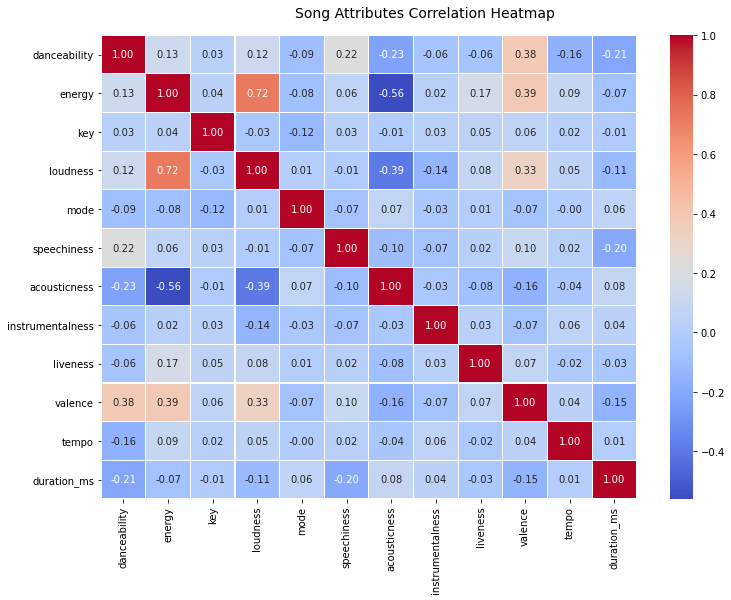

In [80]:
fig, ax = plt.subplots(figsize=(12, 8))
corr = sample_df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
fig.subplots_adjust(top=0.93)
t = fig.suptitle('Song Attributes Correlation Heatmap', fontsize=14)

# Implement PCA

In [6]:
import scipy.io as sio
import matplotlib
import matplotlib.pyplot as plt
from numpy.matlib import repmat
from sklearn.preprocessing import normalize

%matplotlib inline

In [23]:
def eigsort(V, eigvals):
    
    # Sort the eigenvalues from largest to smallest. Store the sorted
    # eigenvalues in the column vector lambd.
    lohival = np.sort(eigvals)
    lohiindex = np.argsort(eigvals)
    lambd = np.flip(lohival)
    index = np.flip(lohiindex)
    Dsort = np.diag(lambd)
    
    # Sort eigenvectors to correspond to the ordered eigenvalues. Store sorted
    # eigenvectors as columns of the matrix vsort.
    M = np.size(lambd)
    Vsort = np.zeros((M, M))
    for i in range(M):
        Vsort[:,i] = V[:,index[i]]
    return Vsort, Dsort


# normc(M) normalizes the columns of M to a length of 1.
def normc(Mat):
    return normalize(Mat, norm='l2', axis=0)


def PCA_(data, normalize=True):
    
    m,n = data.shape

    mean = np.mean(data, 0)
    Z = data - mean
    C = np.dot(Z.T, Z)

    D, V = np.linalg.eig(C)
    Vsort, Dsort = eigsort(V, D)
    U = np.dot(Z, Vsort)
    
    if normalize:
        U = normc(U)
        
    return U, Vsort, Dsort, Z

def PCA_project(sample, k):
    
    U, Vsort, Dsort, Z = PCA_(sample)
    
    # compute principal components
    pc = np.dot(U.T, Z)
    
    #project data into k-dimensional space
    proj_data = np.dot( U[:,0:k], pc[0:k] ) + np.mean(sample, 0)
    
    return proj_data

def PCA_eigenvalues(sample):
    
    U, Vsort, Dsort, Z = PCA_(sample)
    
    eigenvalues = []
    for i in range(sample.shape[1]):
        eigenvalues.append(Dsort[i,i])
        
    return eigenvalues

# Run PCA

In [24]:
proj_data = PCA_project(sample, 5)
eigenvalues = PCA_eigenvalues(sample)

In [83]:
import plotly.express as px

In [ ]:
# visualizes all the original dimensions
fig = px.scatter_matrix(sample_df, dimensions=sample_df.columns)
fig.update_traces(diagonal_visible=False)
fig.show()

In [ ]:
# visualizes all the principal components
fig = px.scatter_matrix(
    U,
    labels=tuple(sample_df.columns),
    dimensions=range(12),
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [ ]:
# visualizes first four principal components
fig = px.scatter_matrix(
    U,
    labels=tuple(sample_df.columns),
    dimensions=range(4),
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [ ]:
### THOUGHT: you can view this graph from a certain angle, which will represent the principle components above
a =  proj_data[:,0]
b =  proj_data[:,1]
c =  proj_data[:,2]
cc = proj_data[:,3]

fig = px.scatter_3d(x=a, y=b, z=c, color=cc)
fig.show()

In [ ]:
### keeping this to cross reference PCA solution w sklearn package, DELETE LATER



# visualizes all the principal components
# from sklearn.decomposition import PCA

# pca = PCA()
# components = pca.fit_transform(pca_df[features])

# labels = {
#     str(i): f"PC {i+1} ({var:.1f}%)"
#     for i, var in enumerate(pca.explained_variance_ratio_ * 100)
# }
# fig = px.scatter_matrix(
#     components,
#     labels=labels,
#     dimensions=range(4),
# )
# fig.update_traces(diagonal_visible=False)
# fig.show()

# K means

In [148]:
# define number of k clusters to use for K means and MOG
def cluster_analysis_kmeans(data):
    
    k_values = range(1,12)
    k_distances = []
    
    for k in k_values:
        X = data
        resp, Kmus, Rnk = runKMeans(X, k)
        loss = np.sum(calcSqDistances(X, Kmus) * Rnk)
        k_distances.append(loss)

    plt.scatter(x=k_values, y=k_distances)
    plt.xlabel('Number of clusters')
    plt.ylabel('Sum centroid distance')
    

The loss will always decrease as k grows to n. We think that 6 is an ideal k-value because there is an elbow in the graph. 

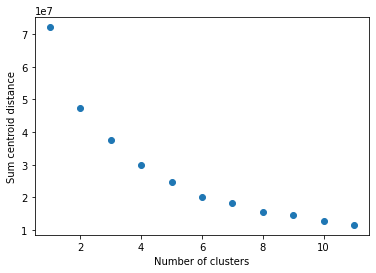

In [149]:
cluster_analysis_kmeans(sample)

## Implement K means

In [31]:
def calcSqDistances(X, Kmus):
    
    A_sq = np.sum(np.square(X)[:,np.newaxis,:], axis=2)
    AB = X.dot(Kmus.T)
    B_sq = np.sum(np.square(Kmus), axis=1)
    
    distances = A_sq - 2*AB + B_sq
    return np.sqrt(distances)

def determineRnk(sqDmat):
        
    inds = np.argmin(sqDmat,axis=1)
    Rnk = np.zeros((inds.size, sqDmat.shape[1]))
    Rnk[np.arange(inds.size),inds] = 1
    
    return Rnk

def recalcMus(X, Rnk):
    
    K = Rnk.shape[1]
    N = X.shape[0]
    
    top = np.sum(Rnk.T.reshape(K,N,1)*np.tile(X,(K,1,1)), axis=1)
    bot = np.sum(Rnk, axis=0).reshape(K,1)
    
    return top / bot 

def runKMeans(X, K, maxiters=1000):
    N = np.shape(X)[0]
    D = np.shape(X)[1]
    
    Kmus = np.zeros((K, D))

    rndinds = np.random.permutation(N)
    Kmus = X[rndinds[:K]];
    
    for iter in range(maxiters):
        # Assign each data vector to closest mu vector
        # Do this by first calculating a squared distance matrix where the n,k entry
        # contains the squared distance from the nth data vector to the kth mu vector

        # sqDmat will be an N-by-K matrix with the n,k entry as specfied above
        sqDmat = calcSqDistances(X, Kmus)

        # R is the "responsibility" matrix
        # R will be an N-by-K matrix of binary values whose n,k entry is set as 
        # Specifically, the n,k entry is 1 if point n is closest to cluster k,
        # and is 0 otherwise
        Rnk = determineRnk(sqDmat)

        KmusOld = Kmus

        # Recalculate mu values based on cluster assignments
        Kmus = recalcMus(X, Rnk)
        
        # convergence condition
        if (np.array_equal(KmusOld, Kmus)):
            break
            
    resp = np.array(list(map(np.where, Rnk))).flatten()
        
    return resp, Kmus, Rnk

## Run K means

We ran K-means repeatedly to find an ideal K that would keep cluster sizes consistent. We found the most success with 10-12 clusters. 
However, let's run some analysis and check what the ideal K should be.

- when printing cluster sizes for multiple iterations, print mean of cluster sizes

In [169]:
resp, Kmus, Rnk = runKMeans(sample, 6)

<ipython-input-31-ace904fecd86>:8: RuntimeWarning:

invalid value encountered in sqrt



In [171]:
counts = np.unique(resp, return_counts=True)[1]
counts
print(sorted(counts))
print(counts)

[29, 149, 197, 341, 493, 557]
[ 29 341 557 197 149 493]


In [236]:
#playlist = list(ids.iloc[sample_df.loc[np.where(resp == 7)].index])
# sp.playlist_add_items()
#sp.current_user_top_artists()

In [38]:
# for i in range(20):
#     resp, Kmus, Rnk = runKMeans(X, 10)
#     counts = np.unique(resp, return_counts=True)[1]
#     print(sorted(counts))

In [53]:
# spotify.track(sample_df.iloc[3]['id'])
#len(sample_df.loc[np.where(resp == 0)])

# playlist = list(ids.iloc[sample_df.loc[np.where(resp == np.argmin(counts))].index])
# print(len(playlist))
# print(playlist)

15
['2UZZtkoLOg7IHxeTAdPFvd', '35PSC06MB5iwRCAiT5EHHh', '4ckpR1gCb3PuoDAbEA9a66', '2p3qr3HQBgsjeE5rFobSDy', '4dGJIcTQb05A0ZQgnvZm6k', '32dzOvkFzmjEPjPidQRxU4', '7hICqTvF8m3qTwhb2TRv0z', '0TtgKq96j4bpE5UQUDXrwH', '5hMRPijl4hm6jOnDhT5EbY', '1u73tmG4xQschbK8cXxSD9', '66qOuPxn0XSg27YLKpdExn', '5GGTgkmfEzkhAfmG0hxXk9', '4B1P7IvjTZXaRJzhs5mvcw', '1goiRWxiG3GTlODrdDZ7NR', '63qZf6349d3ngku9hrzLac']


# Mixture of Gaussians

In [167]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=10).fit(sample)
labels = gmm.predict(sample) # for labels
#log_probs = gmm.score_samples(sample) # weighted log probability for each sample

probs = gmm.predict_proba(sample)
highest_prob = np.apply_along_axis(np.amax, 1, probs)

print(labels)
print(highest_prob)

#np.prod(highest_prob)
#np.sum(log_probs)

[7 3 7 ... 2 0 9]
[0.61521951 0.93419636 0.73459777 ... 0.59643686 0.88615763 0.99512225]


## Run Mixture of Gaussians

MOG returns labels for each datapoint, so we can create playlists in a similar fashion to k-means

In [155]:
# define number of k clusters to use for K means and MOG
# def cluster_analysis_MOG(data):
    
#     k_values = range(1,12)
#     k_probs = []
    
#     for k in k_values:
#         X = data
#         gmm = GaussianMixture(n_components=k).fit(sample)
#         log_probs = gmm.score_samples(sample)
#         k_probs.append(np.sum(log_probs))
        
#     plt.scatter(x=k_values, y=k_probs)
#     ax.set_yscale('log')
#     plt.xlabel('Number of clusters')
#     plt.ylabel('Sum log probs')

In [168]:
#cluster_analysis_MOG(sample)

Here we are doing something similar to what we did to k-means: run MOG multiple times and look at cluster sizes and how they vary between iterations

In [139]:
# for i in range(10):
#     gmm = GaussianMixture(n_components=10, covariance_type='spherical').fit(sample)
#     labels = gmm.predict(sample)

#     counts = np.unique(labels, return_counts=True)[1]
#     print(sorted(counts))

# Results/Analysis

graph:
- graph loss vs number of clusters
- graph elbow for eigenvalues
- cluster magnitude, cluster cardinality

## Generate Playlists

In [227]:
import math

pl_len = 5000

r = np.array(range(0,pl_len))

print(r)

batches = math.ceil(pl_len / 100)

splits = np.array_split(r, batches)



len(splits)
#math.ceil(250 / 100)


[   0    1    2 ... 4997 4998 4999]


100.0

In [228]:
def make_playlist(username, pl_name, track_ids):

    result = sp.user_playlist_create(username, name=pl_name)
    pl_id = result['id']
    pl_len = len(track_ids)
    
    # 100 max at a time
    if pl_len > 100:
        batches = math.ceil(pl_len / 100)

        splits = np.array_split(track_ids, batches)
        
        for split in splits:
            sp.user_playlist_add_tracks(username, pl_id, split)
    else:
        sp.user_playlist_add_tracks(username, pl_id, track_ids)
    
    return pl_id, pl_len

In [229]:


resp, Kmus, Rnk = runKMeans(sample, 6)

track_ids = ids.iloc[sample_df.loc[np.where(resp == 0)].index]

make_playlist(username, 'epic attempt', track_ids)

<ipython-input-31-ace904fecd86>:8: RuntimeWarning:

invalid value encountered in sqrt



('2deE8T7bZUuvmIsJKyoipO', 555)

In [234]:
counts = np.unique(resp, return_counts=True)[1]
counts

array([555,  29, 149, 343, 196, 494], dtype=int64)

In [242]:
# k means playlist of clusters
def kmeans_cluster_playlists(resp, k, pca_flag):
    
    #resp, Kmus, Rnk = runKMeans(sample, k)

    playlist_ids = []
    playlist_lens = []
    
    if pca_flag: 
        pca = ' with pca' 
    else: 
        pca = ' w/o pca'
        
    counts = np.unique(resp, return_counts=True)[1]
    
    for i in range(k):
#         cluster_idx = np.argmin(counts)
#         playlist = list(ids.iloc[sample_df.loc[np.where(resp == cluster_idx)].index])
#         np.delete(counts, cluster_idx) # allows playlist_ids to be in ascending order 
        
        #track_ids = list(ids.iloc[sample_df.loc[np.where(resp == cluster_idx)].index])
        track_ids = list(ids.iloc[sample_df.loc[np.where(resp == i)].index])
        pl_id, pl_len = make_playlist(username, 'k means cluster: ' + str(i+1) + pca, track_ids)
        
        playlist_ids.append(pl_id)
        playlist_lens.append(pl_len)
        
    return playlist_ids, playlist_lens

In [243]:
resp, Kmus, Rnk = runKMeans(sample, 6)

kmeans_cluster_playlists(resp, 6, True)

(['7qNPHQAGzQtBWWRx3E4KKv',
  '1IZSXIzNiIwprAAPkhbXHI',
  '6AyjXdzEeOuSnnxJMwYjMJ',
  '5653vKie9Q3jzfRnlm0f8W',
  '0gLScsqQSXKvxEDibuR66q',
  '0akPDTUZcXKXv3t4W7qLkA'],
 [343, 29, 196, 555, 149, 494])

### compare playlist

Each cluster is a playlist. <br>
6 clusters, 4 parameters: <br>
    - k means with PCA <br>
    - k means without PCA <br>
    - MOG with PCA <br> 
    - MOG without PCA <br>

In [210]:
kmeans_cluster_playlists(resp, 6, True)

(['5evNJKU3T0p8dfC17arN17',
  '3EZVIX6tdL2QrPU0b8u9QY',
  '66CcX1frSE8UGhBWTsm5gL',
  '5C0ODkrGYVPbADmqOkxOe8',
  '4xf2lH27Jc5k5sOHymgZVD',
  '2K8CXVeaD9vWX8H92p5iMG'],
 [29, 29, 29, 29, 29, 29])

# junk cells

In [ ]:
artists = ['tom misch', 'calvin harris', 'justin bieber']
tracks = ['movie', 'feel so close', 'off my face']

track_ids = get_track_ids(artists, tracks)

get_track_features(track_ids)

track_ids[0]

In [ ]:
res = spotify.playlist_tracks('37i9dQZEVXbLiRSasKsNU9')

res['items'][0]['track']['name'] # song name
res['items'][0]['track']['artists'][0]['name'] # artist name
res['items'][0]['track']['id'] # track_id